In [1]:
%matplotlib inline

from math import*
import matplotlib.pyplot as plt
import numpy as np
from array import*
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
from IPython.display import HTML
from IPython.display import display
import matplotlib.mlab as mlab
from iminuit import Minuit, describe

In [2]:
import sys
sys.path.append("/Users/palacio/Work/workspace/Subatech/XenonNt/Radon/lib")
import rdEmanation as rdEmanation
import rdEmanationActivity as rdEmanationActivity 

# Calibration Measurement

## Calibration details:

**Detector:** MonA <br>
**Date:** 28.10.2019 <br>
**Sample:** Calibration of 25mm-pipe from 20190728 <br>
**Calibration standard:** Standard source V4. Expanded from SS to MonA. <br>
**Filling pressure:** ($1300\pm10)\,$mbar <br>
**Drift field:** $-1.\,$kV

**Description:** Calibration measurement taken for the "emanation measurement" of the 250mm-pipe extraction of the 20190728. This calibration was taken several days later, because of a second extractioni realized immediately afterwards." 

## Measurement parameters:

#### Equilibrium activity of standard [Bq]:

In [3]:
#Enter standard activity in Bq
a_s = 0.0286

#Enter error on standard activity in Bq
ea_s = 0.0009

print ('\033[94m' + 'source strength: ({:6.4f}'.format(a_s) + ' +/- {:2.4f}'.format(ea_s) + ') Bq')

source strength: (0.0286 +/- 0.0009) Bq


#### Emanation time of standard [d]:

In [4]:
#Enter emanation time in days
print ('\033[94m' + 'Beginning emanation: 20190808 @ 11:10')
print ('\033[94m' + 'End emanation: 20190817 @ ~11:15')

d = 9 #
h = 0 #
m = 5 #
s = 0 #

### The source was in equilibrium
t_e = (m + h*60 + d*24*60)/(60*24.)

#Enter error on emanation time in days. Usually neglible!
et_e = 30./(60.*24.)

print ('\033[94m' + 'Emanation time of standard: ({:6.4f}'.format(t_e) + ' +/- {:2.4f}'.format(et_e) + ') days')

Beginning emanation: 20190808 @ 11:10
End emanation: 20190817 @ ~11:15
Emanation time of standard: (9.0035 +/- 0.0208) days


#### Measurement times [sec]:

In [5]:
#Time between emanation stop of the sample and the start of the measurement in seconds.
print ('\033[94m' + 'Extraction finished on 20190817 @ ~11:15')
print ('\033[94m' + 'Measurement started on 20190817 @ 14:25')

d1 = 0 #
h1 = 3 #
m1 = 10 #
s1 = 0 #

t1 = d1*3600.*24 + h1*3600.+m1*60.+s1

print ('\033[94m' + 'time between emanation stop and start of run: {:6.0f}'.format(t1) + ' seconds')

Extraction finished on 20190817 @ ~11:15
Measurement started on 20190817 @ 14:25
time between emanation stop and start of run:  11400 seconds


#### File name:

In [6]:
mainPath='/Users/palacio/Work/Subatech/XENONnt/Radon/250mmPipe/data/20190817/'
infile = mainPath+'Ap17082019'

print ('\033[94m' + 'file name: ' + infile)

file name: /Users/palacio/Work/Subatech/XENONnt/Radon/250mmPipe/data/20190817/Ap17082019


#### Po selection channel windows [min-max]:

In [7]:
pol214min=rdEmanation.def_Pol_ranges('Pol_214_min')
pol214max=rdEmanation.def_Pol_ranges('Pol_214_max')
pol218min=rdEmanation.def_Pol_ranges('Pol_218_min')
pol218max=rdEmanation.def_Pol_ranges('Pol_218_max')
pol210min=rdEmanation.def_Pol_ranges('Pol_210_min')
pol210max=rdEmanation.def_Pol_ranges('Pol_210_max')

print ('\033[94m' + 'Po-214 selection window: [{:1.0f}'.format(pol214min) + ',' + '{:1.0f}'.format(pol214max) + '] channel')
print ('\033[94m' + 'Po-218 selection window: [{:1.0f}'.format(pol218min) + ',' + '{:1.0f}'.format(pol218max) + '] channel')
print ('\033[94m' + 'Po-210 selection window: [{:1.0f}'.format(pol210min) + ',' + '{:1.0f}'.format(pol210max) + '] channel')

Po-214 selection window: [275,360] channel
Po-218 selection window: [245,275] channel
Po-210 selection window: [180,245] channel


In [8]:
#Definition of the decay constants of radon and radium
lRn = rdEmanationActivity.lRn()
lRa = rdEmanationActivity.lRa()
lPo210 = rdEmanationActivity.lPo210()

## Quality plots

In [9]:
#LOAD DATA
indata = open(infile)
channel_s = array('i',[0])
timestamp_s = array('f',[0])
runtime_s = array('f',[0])
channel_1 = []
runtime_1 = []
timestamp_1 = []
data = [[],[]]

###runtime=0-> startUnixTime
startUnixTime = 1368550200

lineCount = 0
timeOff = 0

for line in indata:
    a = line.split(',')
    #a  = [ahelp.replace(',','.') for ahelp in aa]

    lineCount = lineCount +1

    for ebin in range(848):
        entries = float(a[ebin])
        
        if entries > 0:            
            numcounts = int(entries)

            for evt in range(numcounts):
                channel_s[0] = ebin
                timestamp_s[0] = (float(a[848]) - startUnixTime)
                runtime_s[0] = (float(a[849])/60)
                channel_1.append(channel_s[0])
                runtime_1.append(runtime_s[0])
                timestamp_1.append(timestamp_s[0])

In [10]:
tBlind=rdEmanation.blindingTime() #300 [min]

channel_Unblind = []
runtime_Unblind = []
channel_Blind = []
runtime_Blind = []
for i in range(0,len(channel_1)):
    if runtime_1[i] > tBlind:
        channel_Unblind.append(channel_1[i])
        runtime_Unblind.append(runtime_1[i])
    else:
        channel_Blind.append(channel_1[i])
        runtime_Blind.append(runtime_1[i])

/Users/palacio/.conda/envs/envPython3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


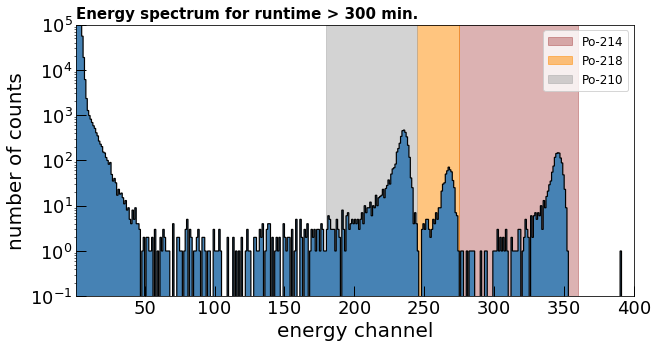

In [11]:
fig = plt.figure(figsize=(10,5))
t = np.arange(0., 500., 1)

bins = (max(channel_Unblind)-min(channel_Unblind))
plt.axvspan(pol214min, pol214max, alpha=0.3, color='darkred',label ='Po-214')
plt.axvspan(pol218min, pol218max, alpha=0.5, color='darkorange', label = 'Po-218')
plt.axvspan(pol210min, pol210max, alpha=0.5, color='darkgray', label = 'Po-210')
plt.hist(channel_Unblind, bins, normed=0, facecolor='steelblue',edgecolor = 'black',histtype='stepfilled',alpha = 1,linewidth = 1.2);

plt.yscale('log', nonposy='clip')
plt.xlabel('energy channel',fontsize=20)
plt.ylabel('number of counts',fontsize=20)

plt.xlim(1, 400)
#plt.ylim(0.1,find_max(channel_Unblind))
plt.ylim(0.1,1e5)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(loc='upper right',fontsize = 'large')
plt.tick_params(direction='in', length=10, width=1, colors='black')
#plt.grid()
plt.title('Energy spectrum for runtime > {:3.0f}'.format(tBlind)+ ' min.',loc='left',fontsize = 15, weight = 'bold')
#plt.savefig("hexe_ptfe_blank.svg")

plt.show()

/Users/palacio/.conda/envs/envPython3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
/Users/palacio/.conda/envs/envPython3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


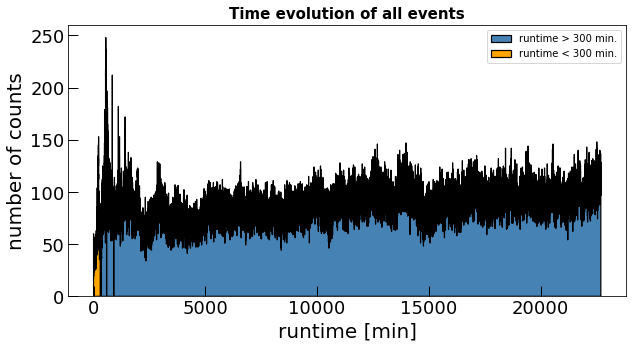

In [12]:
fig = plt.figure(figsize=(10,5))

binsUnblind = (max(runtime_Unblind)-min(runtime_Unblind)-1)#len(run_po212_1)/80
binsUnblindPo212 = plt.hist(runtime_Unblind, int(binsUnblind), normed=0, facecolor='steelblue',edgecolor = 'black',histtype='stepfilled',alpha = 1,linewidth = 1.2, label='runtime > {:3.0f}'.format(tBlind) + ' min.');
binsBlind = (max(runtime_Blind)-min(runtime_Blind)-1)#len(run_po212_1)/80
binsBlindPo212 = plt.hist(runtime_Blind, int(binsBlind), normed=0, facecolor='orange', edgecolor = 'black',histtype='stepfilled',alpha = 1,linewidth = 1.2, label='runtime < {:3.0f}'.format(tBlind) + ' min.');

#plt.yscale('log', nonposy='clip')
plt.xlabel('runtime [min]',fontsize=20)
plt.ylabel('number of counts',fontsize=20)
#plt.xlim(0.1, 800)
#plt.ylim(0.1,800)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.tick_params(direction='in', length=10, width=1, colors='black')
plt.title('Time evolution of all events',loc='center',fontsize = 15, weight = 'bold')
plt.legend()
#plt.savefig("hexe_ptfe_blank.svg")

plt.show()

In [13]:
channel_po214_Unblind = []
runtime_po214_Unblind = []
channel_po214_Blind = []
runtime_po214_Blind = []
for i in range(0,len(channel_1)):
    if ((channel_1[i] > pol214min) & (channel_1[i]<pol214max)) and runtime_1[i] > tBlind:
        channel_po214_Unblind.append(channel_1[i])
        runtime_po214_Unblind.append(runtime_1[i])
    elif ((channel_1[i] > pol214min) & (channel_1[i]<pol214max)) and runtime_1[i] < tBlind:
        channel_po214_Blind.append(channel_1[i])
        runtime_po214_Blind.append(runtime_1[i])       

        
channel_po218_Unblind = []
runtime_po218_Unblind = []
channel_po218_Blind = []
runtime_po218_Blind = []
for i in range(0,len(channel_1)):
    if ((channel_1[i] > pol218min) & (channel_1[i]<pol218max)) and runtime_1[i] > tBlind:
        channel_po218_Unblind.append(channel_1[i])
        runtime_po218_Unblind.append(runtime_1[i])
    elif ((channel_1[i] > pol218min) & (channel_1[i]<pol218max)) and runtime_1[i] < tBlind:
        channel_po218_Blind.append(channel_1[i])
        runtime_po218_Blind.append(runtime_1[i])        
       

    
channel_po210_Unblind = []
runtime_po210_Unblind = []
channel_po210_Blind = []
runtime_po210_Blind = []
for i in range(0,len(channel_1)):
    if ((channel_1[i] > pol210min) & (channel_1[i]<pol210max)) and runtime_1[i] > tBlind:
        channel_po210_Unblind.append(channel_1[i])
        runtime_po210_Unblind.append(runtime_1[i])
    elif ((channel_1[i] > pol210min) & (channel_1[i]<pol210max)) and runtime_1[i] < tBlind:
        channel_po210_Blind.append(channel_1[i])
        runtime_po210_Blind.append(runtime_1[i])        

# Calculation of monA efficiency

## Efficieny method 1
Based on the number of measured events Po-214 between (t1+tBlind) and t2
- t1: start data taking
- tblind: time to reach Po-214 equilibrium (by default 300 min)
- t2: stop data taking

/Users/palacio/.conda/envs/envPython3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


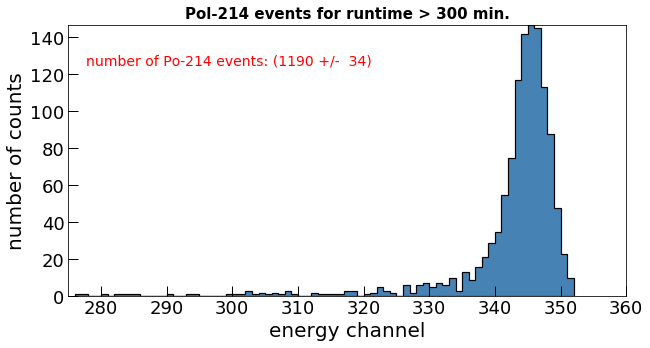

In [175]:
fig = plt.figure(figsize=(10,5))
t = np.arange(0., 500., 1)

binsUnblind = (max(channel_po214_Unblind)-min(channel_po214_Unblind))
plt.axvspan(650, 750, alpha=0.5, color='darkgray')
plt.hist(channel_po214_Unblind, binsUnblind, normed=0, facecolor='steelblue',edgecolor = 'black',histtype='stepfilled',alpha = 1,linewidth = 1.2);
#plt.yscale('log', nonposy='clip')
plt.xlabel('energy channel',fontsize=20)
plt.ylabel('number of counts',fontsize=20)
plt.xlim(pol214min, pol214max)
plt.ylim(0,rdEmanation.find_max(channel_po214_Unblind))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
#plt.legend(loc='upper right',fontsize = 'large')
plt.tick_params(direction='in', length=10, width=1, colors='black')
#plt.grid()
plt.title('Pol-214 events for runtime > {:3.0f}'.format(tBlind) + ' min.',loc='center',fontsize = 15, weight = 'bold')
#plt.savefig("hexe_ptfe_blank.svg")


counts = len(channel_po214_Unblind)
err_counts = np.sqrt(counts)
plt.text(pol214min*1.01, rdEmanation.find_max(channel_po214_Unblind)*0.85, r'number of Po-214 events: ({:3.0f}'.format(counts) + ' +/- {:3.0f}'.format(err_counts) +')', color = 'red', fontsize=14)



plt.show()

In [158]:
# t2 = time since emanation stoped until measurement stoped [s]
t2 = t1 + (int(max(runtime_1)))*60. - tBlind*60 

In [159]:
#------ Determination of the number of counts and the efficieny ----------
activity = rdEmanation.standard_strength(a_s,t_e,lRn)
err_activity = rdEmanation.err_standard_strength(t_e,et_e,a_s,ea_s,lRn)
print ('\033[1m' + 'Source activity: {:6.3f}'.format(activity) + ' +/- {:2.3f}'.format(err_activity) + ' decay events/s')
print('')


print ('\033[1m' + 'Number of measured decayed events between t1(+tBlind) and t2: {:6.0f}'.format(counts) + ' +/- {:2.0f}'.format(err_counts) + '  events')
print('')



value = rdEmanation.calc_eff_rdMonitor(counts,activity,lRn,t1,t2);
error = rdEmanation.calc_err_eff_rdMonitor(counts,err_counts, activity, err_activity, lRn, t1, t2);

print('')
print ('\033[1m' + 'DETECTION EFFICIENCY: ({:6.3f}'.format(value) + ' +/- {:2.3f}'.format(error) + ') ')

Source activity:  0.023 +/- 0.008 decay events/s

Number of measured decayed events between t1(+tBlind) and t2:   1190 +/- 34  events


DETECTION EFFICIENCY: ( 0.118 +/- 0.042) 


## Efficieny method 2
We fit the time evolution of Po-214 events with an exponential decay.

/Users/palacio/.conda/envs/envPython3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
/Users/palacio/.conda/envs/envPython3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


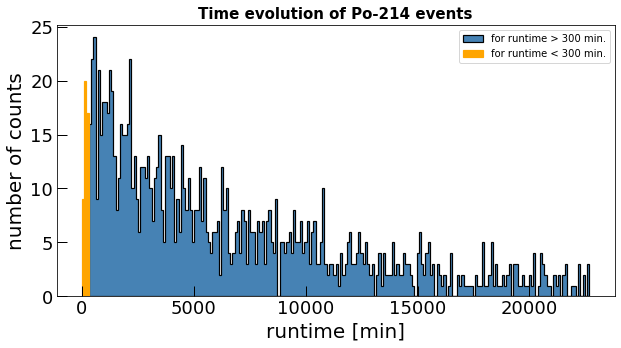

In [157]:
fig = plt.figure(figsize=(10,5))
binWidthDef=100 #[min]

binsUnblind = (max(runtime_po214_Unblind)-tBlind)/binWidthDef
histPol214 = plt.hist(runtime_po214_Unblind, int(binsUnblind), normed=0, facecolor='steelblue',edgecolor = 'black',histtype='stepfilled',alpha = 1,linewidth = 1.2, label= 'for runtime > {:3.0f}'.format(tBlind) + ' min.');
binsBlind = (tBlind-0)/binWidthDef
plt.hist(runtime_po214_Blind, int(binsBlind), normed=0, facecolor='orange',edgecolor = 'orange',histtype='stepfilled',alpha = 1,linewidth = 1.2,  label= 'for runtime < {:3.0f}'.format(tBlind) + ' min.');

#plt.yscale('log', nonposy='clip')
plt.xlabel('runtime [min]',fontsize=20)
plt.ylabel('number of counts',fontsize=20)
#plt.xlim(0, 350)
#plt.ylim(0.1,800)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.tick_params(direction='in', length=10, width=1, colors='black')
plt.title('Time evolution of Po-214 events',loc='center',fontsize = 15, weight = 'bold')
#plt.savefig("hexe_ptfe_blank.svg")
plt.legend()

plt.show()

In [59]:
# define hist_x and hist_y from plot above
histPol214_x_long=histPol214[1]
binWidth=(histPol214_x_long[2]-histPol214_x_long[1])
histPol214_y=histPol214[0]
histPol214_x=np.empty(np.size(histPol214_y))
histPol214_y_norm=np.empty(np.size(histPol214_y))


for  i in range(0,len(histPol214_x)):
    histPol214_x[i]=(histPol214_x_long[i]+histPol214_x_long[i+1])/2
    
    histPol214_y_norm[i]=histPol214_y[i]/binWidth

In [133]:
# Define x^2-function which needs to be minimized.
"""
Author: Joaquim Palacio
Date: 2019/10/31
Description: exponential decay of Rn-214
Variables:
t = time [min]
Ao = A(t=t_0) = Rn-222 decayed atoms at t=t_0
_lambda = Rn-222 decay rate: (-log(0.5)/(3.84*24*60)) [1/min]

Return = number of decayed Rn-222 atoms/min vs time 
"""
def pol214_expo(t,Ao,lambda_):
    return Ao * np.exp(-t*lambda_)
    

# Define x^2-function which needs to be minimized.
"""
Author: Joaquim Palacio
Date: 2019/10/31
Description: exponential decay of Rn-222 to fit in the likelihood
Ao = A(t=t_0) = number of Rn-222 atoms at t=t_0
_lambda = Rn-222 decay rate: (-log(0.5)/(3.84*24*60)) [1/min]

Return = Likelihood defined by 
  Chi2 = [y_data-f(x_data)]**2/sigma_data**2
"""
def pol214_expo_fit(Ao,lambda_):
    s_terms=0

    #xdata = hist_x[i]
    #ydata = hist_y[i]
    #delta_ydata = sqrt(hist_y[i])
    #f(x) = A * np.exp(-x*B)
    
    for i in range(0,len(histPol214_x)-1):
        # Ignore empty bins (not super correct...)
        if histPol214_y[i] == 0.:
            continue
        
        term = (histPol214_y[i]-(Ao * np.exp(-histPol214_x[i]*lambda_)))**2/histPol214_y[i]
        s_terms = s_terms + term

    return s_terms  

#import minuit, describe
describe(pol214_expo_fit)

['Ao', 'lambda_']

In [142]:
lRn_min = lRn*60.

#mm = Minuit(pol214_expo_fit, Ao = 10, lambda_ = lRn_min, limit_Ao = (1,50) , limit_lambda_ = (0.,10.));
mm = Minuit(pol214_expo_fit, Ao= 30, limit_Ao = (1,50), lambda_ = lRn_min, limit_lambda_ = (lRn_min*(1-0.001),lRn_min*(1+0.001)));



/Users/palacio/.conda/envs/envPython3/lib/python3.7/site-packages/ipykernel_launcher.py:4: InitialParamWarning: Parameter Ao is floating but does not have initial step size. Assume 1.
  after removing the cwd from sys.path.
/Users/palacio/.conda/envs/envPython3/lib/python3.7/site-packages/ipykernel_launcher.py:4: InitialParamWarning: Parameter lambda_ is floating but does not have initial step size. Assume 1.
  after removing the cwd from sys.path.
/Users/palacio/.conda/envs/envPython3/lib/python3.7/site-packages/ipykernel_launcher.py:4: InitialParamWarning: errordef is not given. Default to 1.
  after removing the cwd from sys.path.


In [143]:
mm.migrad()

------------------------------------------------------------------
| FCN = 172.2                   |      Ncalls=56 (56 total)      |
| EDM = 1.58E-05 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | Ao      |   14.5    |    0.5    |            |            |    1    |   50    |       |
| 1 | lambda_ | 1.255E-4  | 0.001E-4  |            |            |0.000125227|0.000125477|       |
---------------------------------------------------------------------------------------------

In [144]:
print(mm.get_param_states())

A0_fit=mm.values[0]             ## [events in bin zero]
delta_A0_fit=mm.errors[0]       ## [events in bin zero]
lambda_fit=mm.values[1]         ## [1/bin]
delta_lambda_fit=mm.errors[1]   ## [1/bin]

print('')
print('Ao = {:3.1f}'.format(A0_fit) + ' +- {:3.1f}'.format(delta_A0_fit)+ ' decayed particles/bin0')
print('lambda = {:1.2e}'.format(lambda_fit) + ' +- {:1.2e}'.format(delta_lambda_fit)+ ' 1/bin')

## We take into account the number of empty bins for computing the chi2
numEmptyBins=np.size(histPol214_y[histPol214_y==0])
chi2=mm.fval / (len(histPol214_y)-numEmptyBins - 2)
print('Reduced chi2: {:1.2}'.format(chi2))

---------------------------------------------------------------------------------------------
|   | Name    |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
---------------------------------------------------------------------------------------------
| 0 | Ao      |   14.5    |    0.5    |            |            |    1    |   50    |       |
| 1 | lambda_ | 1.255E-4  | 0.001E-4  |            |            |0.000125227|0.000125477|       |
---------------------------------------------------------------------------------------------

Ao = 14.5 +- 0.5 decayed particles/bin0
lambda = 1.25e-04 +- 1.26e-07 1/bin
Reduced chi2: 0.84


/Users/palacio/.conda/envs/envPython3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  app.launch_new_instance()


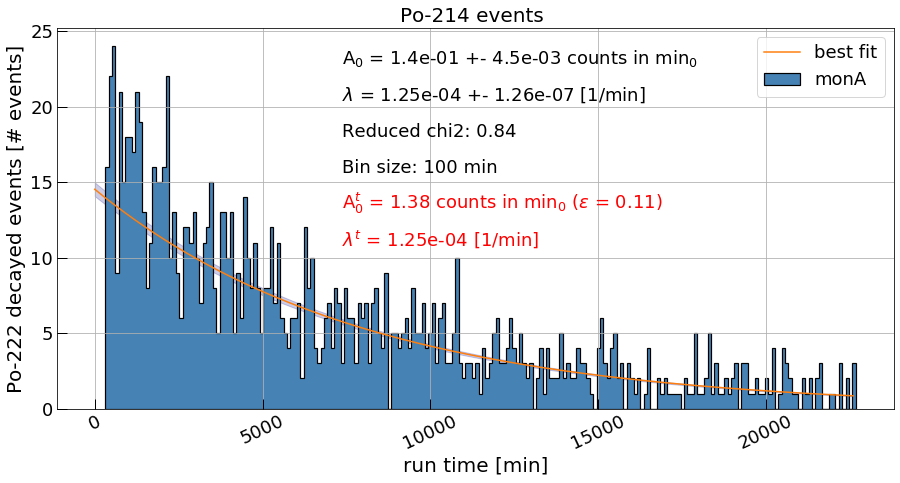

In [148]:
fig = plt.figure(figsize=(15,7))

xx = []
yy = []
yy_l = []
yy_u = []


for i in range(0,int(max(runtime_po214_Unblind)),100):
    xx.append(i)
    yy.append(pol214_expo(i,A0_fit,lambda_fit))
    yy_l.append(pol214_expo(i,A0_fit + delta_A0_fit, lambda_fit + delta_lambda_fit ))
    yy_u.append(pol214_expo(i,A0_fit - delta_A0_fit, lambda_fit - delta_lambda_fit))

    
plt.hist(runtime_po214_Unblind, int(binsUnblind), normed=0, facecolor='steelblue',edgecolor = 'black',histtype='stepfilled',alpha = 1,linewidth = 1.2, label='monA');
#plt.scatter(histPol214_x, histPol214_y)
#plt.scatter(histPol214_x, histPol214_y_norm)

plt.plot(xx,yy,linewidth = 1.5, label='best fit')
plt.plot(xx,yy_l,linestyle = '')
plt.plot(xx,yy_u,linestyle = '')
plt.fill_between(xx,yy_l,yy_u, color='darkblue', alpha='0.2')


numBinPlot=70
plt.text(histPol214_x[numBinPlot], np.max(histPol214_y)*0.95, r'A$_0$ = {:3.1e}'.format(A0_fit/binWidth) + ' +- {:3.1e}'.format(delta_A0_fit/binWidth) + ' counts in min$_0$',fontsize=18)
plt.text(histPol214_x[numBinPlot], np.max(histPol214_y)*0.85, r'$\lambda$ = {:3.2e}'.format(lambda_fit) + ' +- {:3.2e}'.format(delta_lambda_fit) + ' [1/min]' ,fontsize=18)
plt.text(histPol214_x[numBinPlot], np.max(histPol214_y)*0.75, r'Reduced chi2: {:1.2f}'.format(chi2),fontsize=18)
plt.text(histPol214_x[numBinPlot], np.max(histPol214_y)*0.65, r'Bin size: {:1.0f}'.format(binWidth)+' min',fontsize=18)
activity = rdEmanation.standard_strength(a_s,t_e,lRn)
plt.text(histPol214_x[numBinPlot], np.max(histPol214_y)*0.55, r'A$_0^t$ = {:3.2f}'.format(activity*60) + ' counts in min$_0$ ($\epsilon$ = {:3.2f}'.format((A0_fit/binWidth)/(activity*60))+')', color = 'red', fontsize=18)
plt.text(histPol214_x[numBinPlot], np.max(histPol214_y)*0.45, r'$\lambda^t$ = {:3.2e}'.format(lRn*60.) + ' [1/min]', color = 'red', fontsize=18)

plt.xlabel('',fontsize=20)
plt.title('Po-214 events ',fontsize=20)
plt.xlabel('run time [min]')
plt.ylabel('Po-222 decayed events [# events]',fontsize=20)

#plt.xlim(250,350)
#plt.ylim(1e-2,2000)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(loc='upper right',fontsize = '18')
plt.tick_params(direction='in', length=10, width=1, colors='black')
plt.xticks( rotation=25 )
plt.grid()
#plt.savefig("spectra_po210.svg")


plt.show()

In [151]:
#rdEmanationActivity.act(np.size(runtime_po214_Unblind),0,(runtime_po214_Unblind[-1]-tBlind)*60.,1,lRn)
print ('\033[94m')
print ('')
print ('---------------------------------------------------')
print ('')
print ('')
print ('\033[94m' + 'Previous emanation measurement started on 2019/07/28 @ 11:24')
print ('\033[94m' + 'Current calibration measurement started on 2019/08/17 @ 14:25')

d2=20
h2=3
m2=1
s2=0

# time interval between the two measurements [min]
minutes_emanation=(d2*24*60 + h2*60 + m2 +s2/60.)
# measured emanation activity/min at t0 from previous measurement [#/min]
activity_zero_emanation = 1.6e-01
# measured decay-constant from previous measurement [1/min]
decay_emanation = 1.93e-04
# measured activity induced from previous measurement [1/min]
activity_emanation=pol214_expo(minutes_emanation,activity_zero_emanation,decay_emanation)
print ('\033[94m' + 'Minutes passed between emanation and calibration measurements: {:3.0f}'.format(minutes_emanation) + ' min')
print ('')
print ('')
print ('\033[94m' + 'A(t) = Ao * e^(-t*lambda_)')
print ('\033[94m' + 'Where:')
print ('\033[94m' + 'Ao = {:3.1e}'.format(activity_zero_emanation) + ' counts/min0')
print ('\033[94m' + 'lambda_ = {:3.2e}'.format(decay_emanation) + ' [1/min]')
print ('')
print ('\033[94m' + 'Activity induced = {:3.0e}'.format(activity_emanation)+' number of decayed Rn-222 events at min0 (t1+tBlind)')


print ('')
print ('')
print ('---------------------------------------------------')
print ('')
print ('')


print ('\033[94m' + 'Current activity measured:')
print ('\033[94m' + 'Ao = {:3.1e}'.format(A0_fit/binWidth) + ' +- {:3.1e}'.format(delta_A0_fit/binWidth) + ' number of decayed Rn-222 events at min0 (t1+tBlind)')
print ('\033[94m' + 'lambda_ = {:3.2e}'.format(lambda_fit/binWidth) + ' +- {:3.2e}'.format(delta_lambda_fit/binWidth) + ' [1/min]')


print ('')
print ('')


num_decayed_Rn222=0
for t in range(int(300), int(t2)):
    num_decayed_Rn222=num_decayed_Rn222+pol214_expo(t,A0_fit,lambda_fit)/binWidth
print ('\033[94m' + 'Number of measured decayed Rn-222 events (from the fit):  {:3.0f}'.format(num_decayed_Rn222) +' events')



print ('')
print ('')
print ('---------------------------------------------------')
print ('')
print ('')


measured_SS_activity_min0=A0_fit/binWidth-activity_emanation
delta_activity_emanation=0.
delta_measured_SS_activity_min0=np.sqrt(
    (delta_A0_fit/binWidth)**2 + delta_activity_emanation**2)

efficiency2=measured_SS_activity_min0/(activity*60.)
delta_efficiency2 = np.sqrt(
    1./(activity*60)**2 * delta_measured_SS_activity_min0**2
    + (measured_SS_activity_min0/(activity*60.)**2)**2 * (err_activity*60.)**2 )


print ('\033[94m' + 'Excess activity measured due to standard source:')
print ('\033[94m' + 'A_hat = {:3.1e}'.format(measured_SS_activity_min0) + ' decay events/min0')
print ('\033[94m' + 'A_hat_theory = {:3.1e}'.format(activity) + ' decay events/min0')
print ('')
print ('\033[30m' + '\033[1m' + 'DETECTION EFFICIENCY: ({:6.3f}'.format(efficiency2) + ' +/- {:2.3f}'.format(delta_efficiency2) + ') ')
print ('')




---------------------------------------------------


Previous emanation measurement started on 2019/07/28 @ 11:24
Current calibration measurement started on 2019/08/17 @ 14:25
Minutes passed between emanation and calibration measurements: 28981 min


A(t) = Ao * e^(-t*lambda_)
Where:
Ao = 1.6e-01 counts/min0
lambda_ = 1.93e-04 [1/min]

Activity induced = 6e-04 number of decayed Rn-222 events at min0 (t1+tBlind)


---------------------------------------------------


Current activity measured:
Ao = 1.4e-01 +- 4.5e-03 number of decayed Rn-222 events at min0 (t1+tBlind)
lambda_ = 1.25e-06 +- 1.26e-09 [1/min]


Number of measured decayed Rn-222 events (from the fit):  1112 events


---------------------------------------------------


Excess activity measured due to standard source:
A_hat = 1.4e-01 decay events/min0
A_hat_theory = 2.3e-02 decay events/min0

DETECTION EFFICIENCY: ( 0.105 +/- 0.037) 



# Po-214 / Po-218 ratio

The ratio of Po-218 and Po-214 events turned out to be an indicator for a change in the collection efficiency of the radon daughters.


In [152]:
Po_ratio_214_218 = rdEmanationActivity.element_ratio(len(channel_po214_Unblind),len(channel_po218_Unblind))
ePo_ratio_214_218 = rdEmanationActivity.error_element_ratio(len(channel_po214_Unblind),len(channel_po218_Unblind))

print ('\033[1m' + 'Po-214 / Po-218 ratio: ({:6.3f}'.format(Po_ratio_214_218) + ' +/- {:2.3f}'.format(ePo_ratio_214_218) + ') ')

Po-214 / Po-218 ratio: ( 2.275 +/- 0.119) 


# Po-210 activity

The Po-210 rate, on the other hand is expected to be constant due to the long half-life of Pb-210 (>20 years). Any non constant behaviour might indicate noise contamination.

/Users/palacio/.conda/envs/envPython3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/palacio/.conda/envs/envPython3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


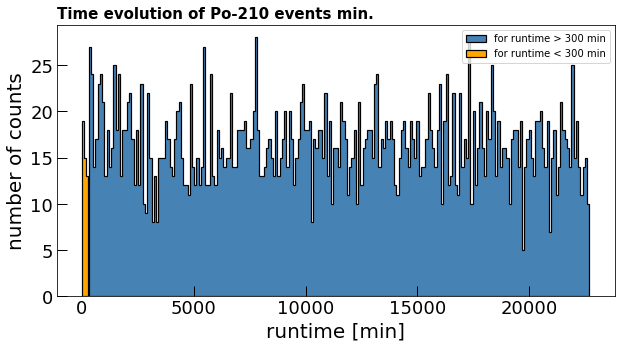

In [156]:
fig = plt.figure(figsize=(10,5))

plt.hist(runtime_po210_Unblind, int(binsUnblind), normed=0, facecolor='steelblue',edgecolor = 'black',histtype='stepfilled',alpha = 1,linewidth = 1.2, label='for runtime > {:3.0f}'.format(tBlind) + ' min');
plt.hist(runtime_po210_Blind, int(binsBlind), normed=0, facecolor='orange',edgecolor = 'black',histtype='stepfilled',alpha = 1,linewidth = 1.2, label='for runtime < {:3.0f}'.format(tBlind) + ' min');

#plt.yscale('log', nonposy='clip')
plt.xlabel('runtime [min]',fontsize=20)
plt.ylabel('number of counts',fontsize=20)
#plt.xlim(0.1, 800)
#plt.ylim(0.1,800)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.tick_params(direction='in', length=10, width=1, colors='black')
plt.title('Time evolution of Po-210 events' + ' min.',loc='left',fontsize = 15, weight = 'bold')
#plt.savefig("hexe_ptfe_blank.svg")
plt.legend()

plt.show()

In [25]:
activityPo210=rdEmanationActivity.act(len(channel_po210_Blind)+len(channel_po210_Unblind),0,max(runtime_Unblind)*60,1,lPo210)
eactivityPo210=rdEmanationActivity.err_act(len(channel_po210_Blind)+len(channel_po210_Unblind),0,max(runtime_Unblind)*60,1,0,lPo210)

print ('\033[1m' + 'activity Po-210: ({:6.3f}'.format(activityPo210*1000) + ' +/- {:2.3}'.format(eactivityPo210*1000) + ' mBq) ')

activity Po-210: ( 2.729 +/- 0.0448 mBq) 


# Hide all the code and show the plots only

In [26]:
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')